# Non-Daily Data

# Using monthly data

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

In [3]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/AirPassengers.csv'
df = pd.read_csv(URL)
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

In [4]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       501.449     0.0176543       240.422       0.649           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       503.353    0.00108498       90.0341      0.3062      0.3062      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       503.446   0.000140197        80.679           1           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       503.467   9.96247e-05       114.472   7.079e-07       0.001      451  LS failed, Hessian reset 
     359       503.486   8.82342e-09       72.6598    0.004982           1      538   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


## Forma errada

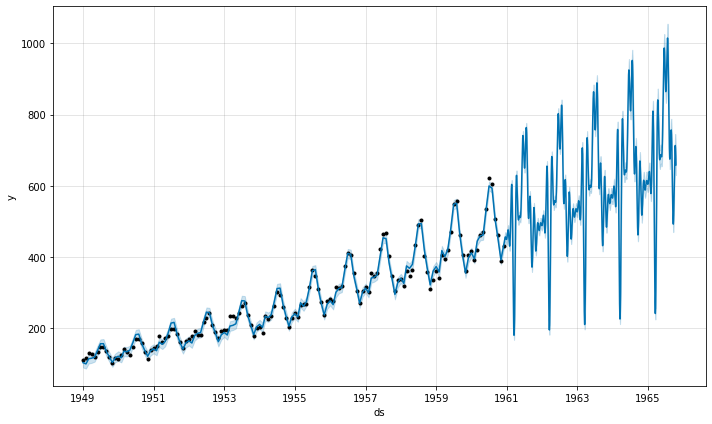

In [8]:
future = model.make_future_dataframe(periods=356 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

## Forma correta

`'MS'`: Month Start

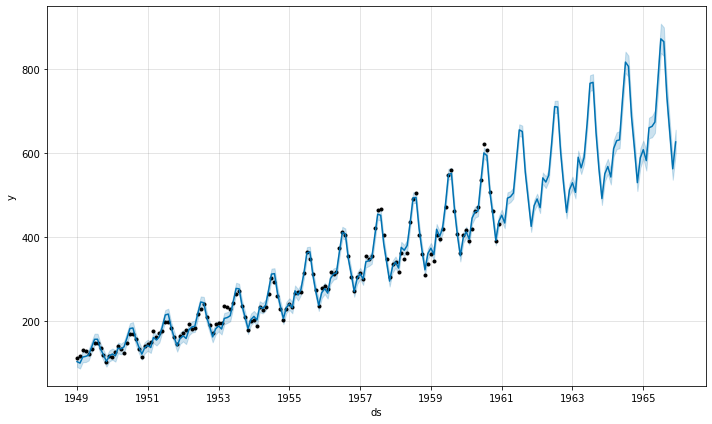

In [9]:
future = model.make_future_dataframe(periods=12 * 5, freq='MS')
forecast= model.predict(future)
fig = model.plot(forecast)
plt.show()

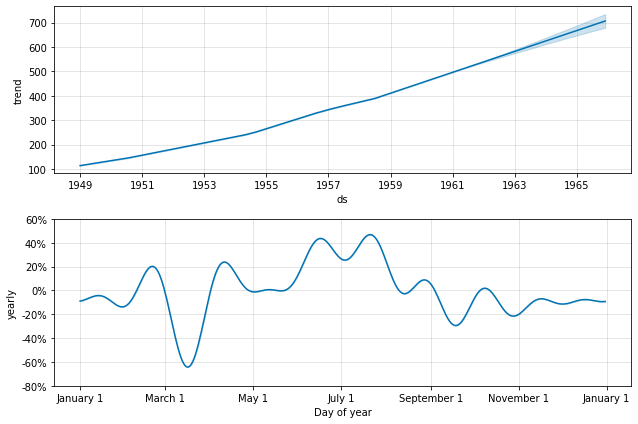

In [10]:
fig2 = model.plot_components(forecast)
plt.show()

# Using sub-daily data

In [11]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_hourly.csv'
data = pd.read_csv(URL)
df = pd.DataFrame({'ds': pd.to_datetime(data['date']), 'y': data['rides']})

In [12]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')

Initial log joint probability = -677.584
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       66292.2     0.0853847       13386.9           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       66598.5    0.00212035       3593.91      0.4982      0.4982      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       66777.1      0.003243       1866.15           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       66861.5    0.00281805       1479.21      0.1119           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       66925.8    0.00264557       527.876           1           1      606   
    Iter      log prob        ||dx||      ||grad||       alpha  

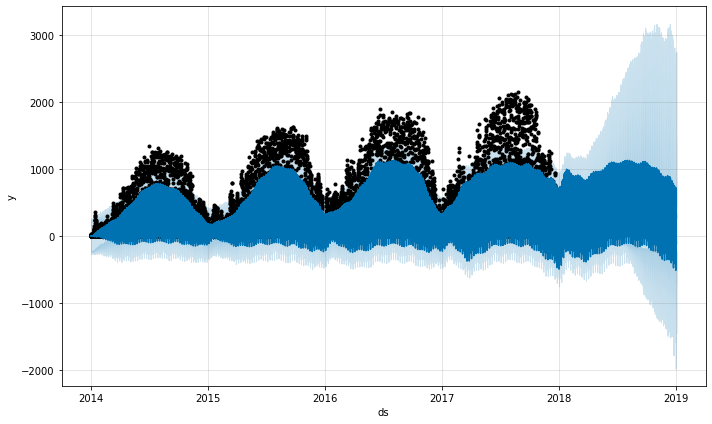

In [13]:
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

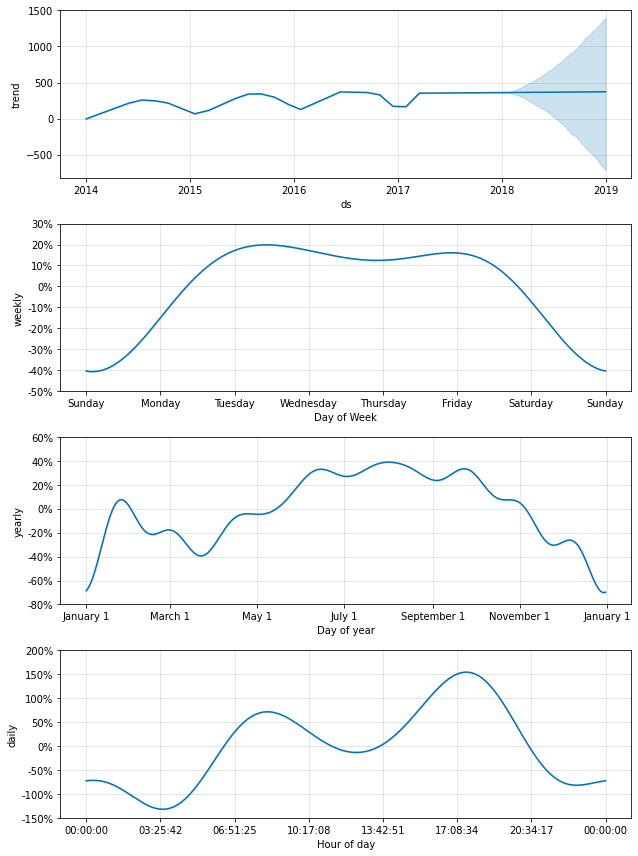

In [14]:
fig2 = model.plot_components(forecast)
plt.show()

# Using data with regular gaps

In [15]:
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour < 18)]

Initial log joint probability = -418.279
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       26626.6     0.0083393       419.097           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       26730.5    0.00470227       688.149      0.6434      0.6434      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       26763.1     0.0179278       959.798           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       26785.7    0.00856522       1108.45       1.604      0.1604      516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       26798.2     0.0177177       1924.27           1           1      635   
    Iter      log prob        ||dx||      ||grad||       alpha  

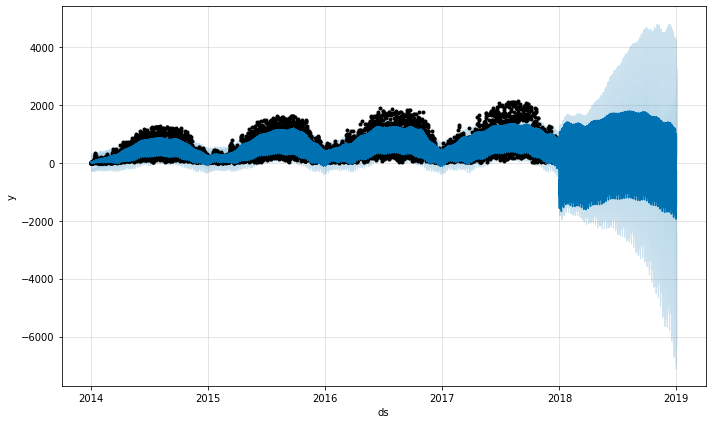

In [16]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

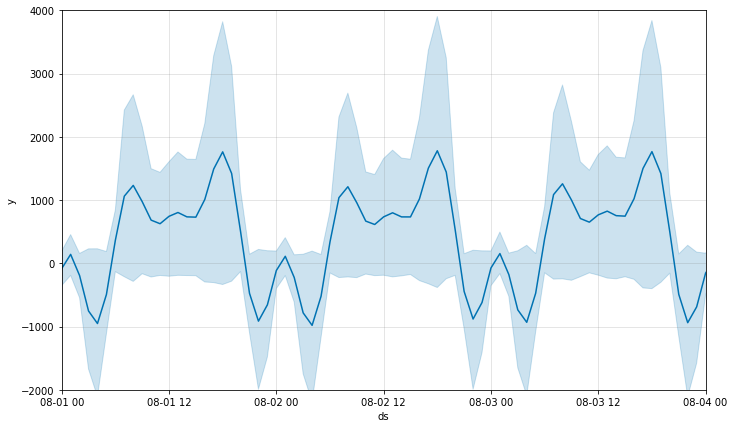

In [19]:
fig = model.plot(forecast)
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

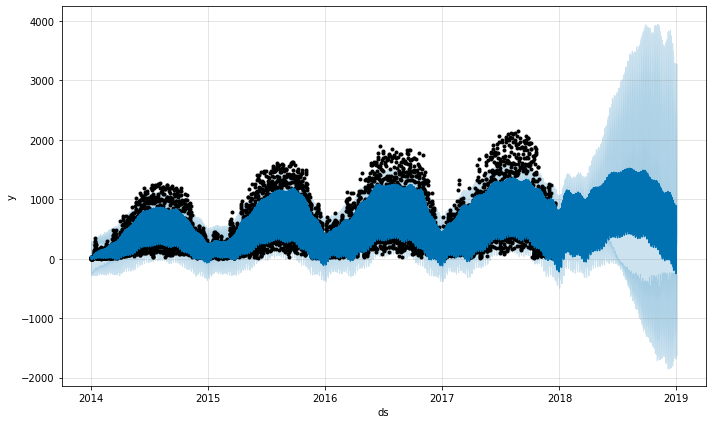

In [20]:
future2 = future[(future['ds'].dt.hour >= 8) &
                 (future['ds'].dt.hour < 18)]
forecast2 = model.predict(future2)
fig = model.plot(forecast2)
plt.show()

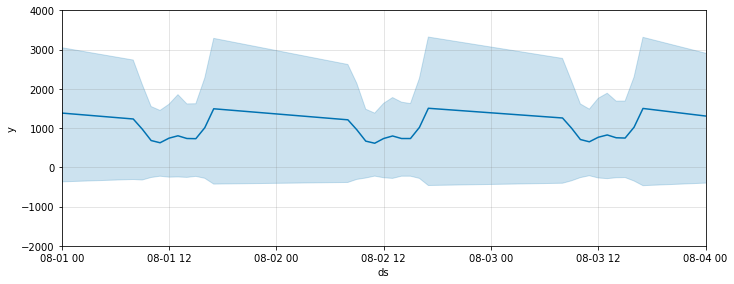

In [21]:
fig = model.plot(forecast2, figsize=(10, 4))
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

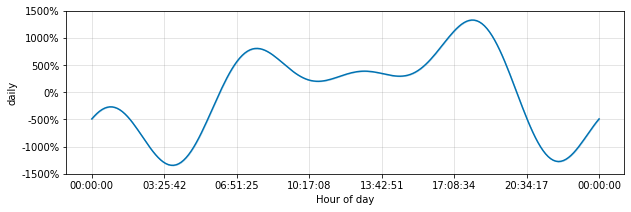

In [22]:
from prophet.plot import plot_seasonality
plot_seasonality(model, 'daily', figsize=(10, 3))
plt.show()